<a href="https://colab.research.google.com/github/Lawkage1/Data-Analysis-With-Python/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
#loading the data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
type(data) #sometimes bunch can be used as dictionaries

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(data['frame'])

None


In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
X = data.data
y = data.target

In [ ]:
#training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
N,D = X_train.shape
print(N,D)

455 30


In [ ]:
print(y_train.shape)

(455,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#binary classification
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9875 - loss: 0.0736 - val_accuracy: 0.9825 - val_loss: 0.0787
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9879 - loss: 0.0725 - val_accuracy: 0.9825 - val_loss: 0.0784
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0971 - val_accuracy: 0.9825 - val_loss: 0.0781
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0675 - val_accuracy: 0.9825 - val_loss: 0.0778
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0675 - val_accuracy: 0.9825 - val_loss: 0.0776
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.0726 - val_accuracy: 0.9825 - val_loss: 0.0776
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0788 - val_accuracy: 0.9825 - val_loss: 0.0773
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0714 - val_accuracy: 0.9825 - v

In [ ]:
print("Train Score:",model.evaluate(X_train,y_train))
print("Test Score:",model.evaluate(X_test,y_test))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0495 
Train Score: [0.0602092482149601, 0.9868131875991821]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9815 - loss: 0.0684 
Test Score: [0.05998137965798378, 0.9824561476707458]


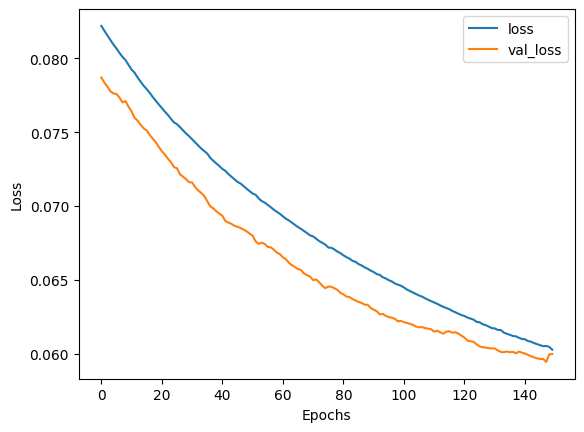

In [ ]:
plt.plot(r.history['loss'],label='loss') #the loss,accuracy and other stuffs are stored in the history attribute of tensorflow/kera which keeps track of all our training
plt.plot(r.history['val_loss'],label='val_loss') #once the training is completed we can access the history dictionary
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();
plt.show()

#**Making Predictions**

In [ ]:
P = model.predict(X_test)
print(P) #p(y=1 | x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
[[0.35607022]
 [0.9118093 ]
 [0.5716528 ]
 [0.25713193]
 [0.43340588]
 [0.3563302 ]
 [0.9537485 ]
 [0.87546766]
 [0.21416008]
 [0.7688226 ]
 [0.26348928]
 [0.82413435]
 [0.6770214 ]
 [0.5642799 ]
 [0.5331984 ]
 [0.7125907 ]
 [0.78423196]
 [0.33578852]
 [0.15451436]
 [0.865761  ]
 [0.4455899 ]
 [0.3544327 ]
 [0.75952023]
 [0.29252124]
 [0.35567012]
 [0.6982128 ]
 [0.7161646 ]
 [0.07705793]
 [0.2967831 ]
 [0.41573367]
 [0.2568074 ]
 [0.61539143]
 [0.25928843]
 [0.5400132 ]
 [0.18114805]
 [0.37515485]
 [0.57039154]
 [0.68072927]
 [0.73428005]
 [0.443704  ]
 [0.33174267]
 [0.25292814]
 [0.25793654]
 [0.3642727 ]
 [0.5652635 ]
 [0.13657148]
 [0.04329026]
 [0.42696825]
 [0.1403453 ]
 [0.7616587 ]
 [0.5262231 ]
 [0.71511316]
 [0.09271522]
 [0.72415614]
 [0.32819724]
 [0.5374701 ]
 [0.23754825]
 [0.9165648 ]
 [0.12423385]
 [0.42163944]
 [0.4046599 ]
 [0.6881927 ]
 [0.94174105]
 [0.45416123]
 [0.4193898 ]
 [0.23820283]
 [0.21551539]
 [0.2582251 ]
 [0.37612

In [ ]:
P = np.round(P).flatten()
print(P)  #these are the predictions

[0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.]


In [ ]:
#calculating accuracy an alternate method for evaluate function
print('Manually Calculated Accuracy:',np.mean(P==y_test))
print("Evaluate Output:",model.evaluate(X_test,y_test))

Manually Calculated Accuracy: 0.3157894736842105
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3096 - loss: 1.1243  
Evaluate Output: [1.0970669984817505, 0.31578946113586426]
